In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Load the data
data = pd.read_csv('DataCapstone.csv', delimiter=';', decimal=' ')
data.columns = [col.strip() for col in data.columns]
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data.set_index('Date', inplace=True)

# Ensure all data is in the correct format, replacing commas and spaces if necessary
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].str.replace(' ', '').str.replace(',', '.').astype(float)

# Function to perform and display ADF test results
def perform_adf_test(series, name):
    result = adfuller(series.dropna())  # Removing any NA values if present
    print(f'Results of Dickey-Fuller Test for {name}:')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'    {key}: {value}')
    
    # Determine stationarity based on the p-value
    if result[1] < 0.05:
        print(f"Conclusion: {name} is stationary.\n")
    else:
        print(f"Conclusion: {name} is not stationary and will be differenced.\n")
        # Perform differencing
        differenced_series = series.diff().dropna()
        perform_adf_test(differenced_series, name + " - Differenced")

# List of asset column names
assets = ['S&P 500 PRICE IN USD', 'GOLD PRICE IN USD', 'BITCOIN PRICE IN USD', 'ETHEREUM PRICE IN USD']

# Perform ADF test for each asset
for asset in assets:
    perform_adf_test(data[asset], asset)

Results of Dickey-Fuller Test for S&P 500 PRICE IN USD:
ADF Statistic: -0.9870578021449633
p-value: 0.7579553538952977
Critical Values:
    1%: -3.4351497363134746
    5%: -2.863659724044779
    10%: -2.567898540568101
Conclusion: S&P 500 PRICE IN USD is not stationary and will be differenced.

Results of Dickey-Fuller Test for S&P 500 PRICE IN USD - Differenced:
ADF Statistic: -11.162688677016426
p-value: 2.762693373177113e-20
Critical Values:
    1%: -3.4351497363134746
    5%: -2.863659724044779
    10%: -2.567898540568101
Conclusion: S&P 500 PRICE IN USD - Differenced is stationary.

Results of Dickey-Fuller Test for GOLD PRICE IN USD:
ADF Statistic: -0.9296583261191678
p-value: 0.7780486928717056
Critical Values:
    1%: -3.4351147636466535
    5%: -2.863644291237025
    10%: -2.5678903221157023
Conclusion: GOLD PRICE IN USD is not stationary and will be differenced.

Results of Dickey-Fuller Test for GOLD PRICE IN USD - Differenced:
ADF Statistic: -36.85861305983253
p-value: 0.0


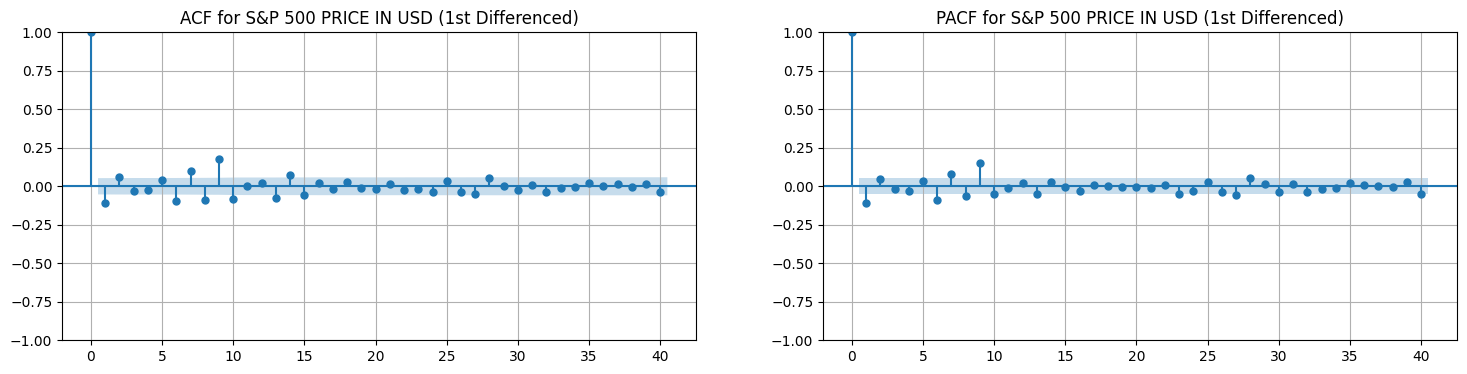

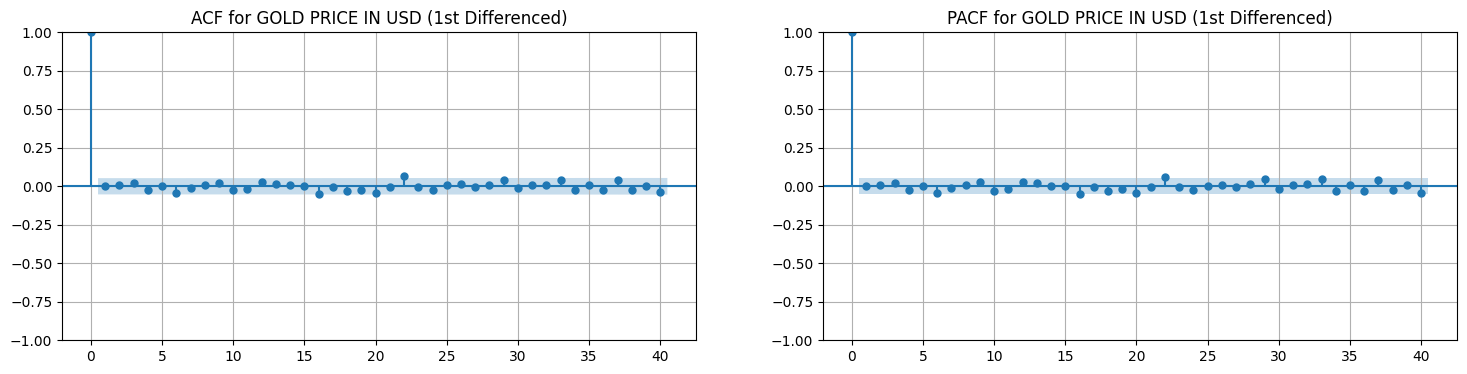

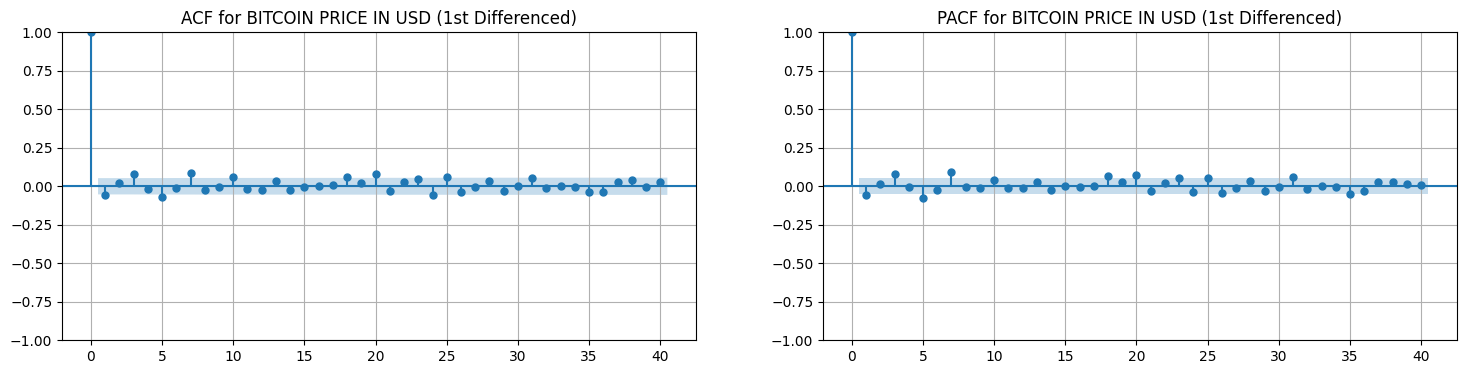

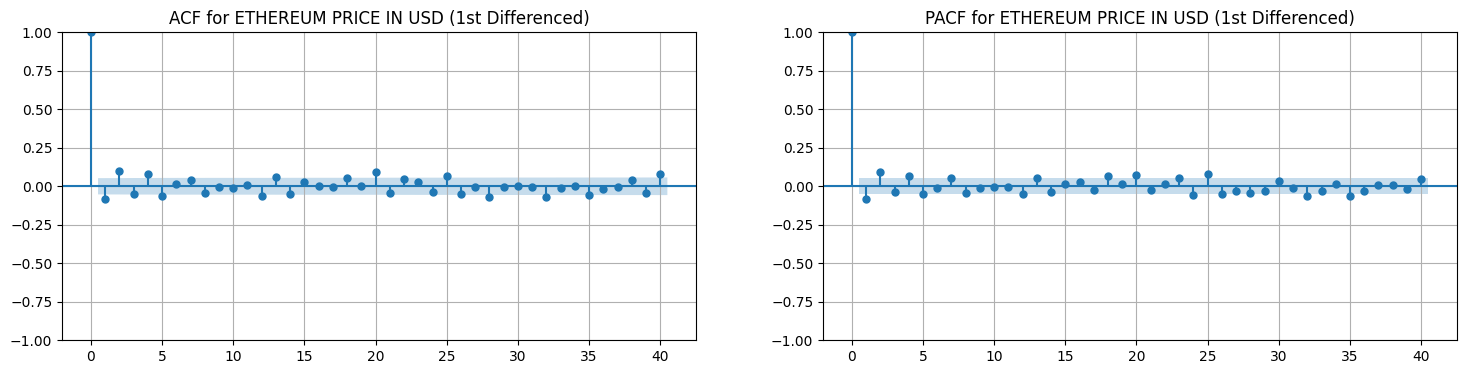

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the data
data = pd.read_csv('DataCapstone.csv', delimiter=';', decimal=' ')
data.columns = [col.strip() for col in data.columns]
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data.set_index('Date', inplace=True)

# Ensure all data is in the correct format, replacing commas and spaces if necessary
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].str.replace(' ', '').str.replace(',', '.').astype(float)

# List of asset column names
assets = ['S&P 500 PRICE IN USD', 'GOLD PRICE IN USD', 'BITCOIN PRICE IN USD', 'ETHEREUM PRICE IN USD']

# Function to plot ACF and PACF after first differencing
def plot_acf_pacf_differenced(series, name):
    # First differencing
    differenced_series = series.diff().dropna()

    # Plotting ACF
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 4))
    plot_acf(differenced_series, lags=40, ax=ax1, title=f'ACF for {name} (1st Differenced)')
    ax1.grid(True)
    
    # Plotting PACF
    plot_pacf(differenced_series, lags=40, ax=ax2, title=f'PACF for {name} (1st Differenced)')
    ax2.grid(True)
    
    plt.show()

# Perform ACF and PACF for each asset after differencing
for asset in assets:
    plot_acf_pacf_differenced(data[asset].dropna(), asset)

In [20]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Load the data
data = pd.read_csv('DataCapstone.csv', delimiter=';', decimal=' ')
data.columns = [col.strip() for col in data.columns]
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data.set_index('Date', inplace=True)

# Replace commas and convert to float
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].str.replace(',', '.').astype(float)

# Define the assets
assets = ['BITCOIN PRICE IN USD', 'ETHEREUM PRICE IN USD']

# Function to optimize ARIMA parameters
def optimize_arima(series, p_range, d_range, q_range):
    best_aic = np.inf
    best_order = None
    best_model = None

    warnings.filterwarnings('ignore')
    
    for p in p_range:
        for d in d_range:
            for q in q_range:
                try:
                    model = ARIMA(series, order=(p, d, q))
                    results = model.fit()
                    aic = results.aic
                    if aic < best_aic:
                        best_aic = aic
                        best_order = (p, d, q)
                        best_model = results
                except:
                    continue

    print(f'Best ARIMA{best_order} AIC: {best_aic}')
    return best_model

# Example parameter ranges
p_range = range(0, 5)  # p values from 0 to 5
d_range = range(1, 2)  # d is fixed at minimum 1 but can be 2 because of log-differenciation
q_range = range(0, 5)  # q values from 0 to 5

# Optimize ARIMA for each asset
for asset in assets:
    print(f'\nOptimizing ARIMA parameters for {asset}')
    model = optimize_arima(data[asset].dropna(), p_range, d_range, q_range)
    print(model.summary())


Optimizing ARIMA parameters for BITCOIN PRICE IN USD
Best ARIMA(4, 1, 4) AIC: 23631.439436029093
                                SARIMAX Results                                 
Dep. Variable:     BITCOIN PRICE IN USD   No. Observations:                 1376
Model:                   ARIMA(4, 1, 4)   Log Likelihood              -11806.720
Date:                  Tue, 07 May 2024   AIC                          23631.439
Time:                          15:43:29   BIC                          23678.475
Sample:                      01-01-2019   HQIC                         23649.038
                           - 04-09-2024                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6421      0.118     -5.460      0.000      -0.873      -0.412
ar.L2         -1.

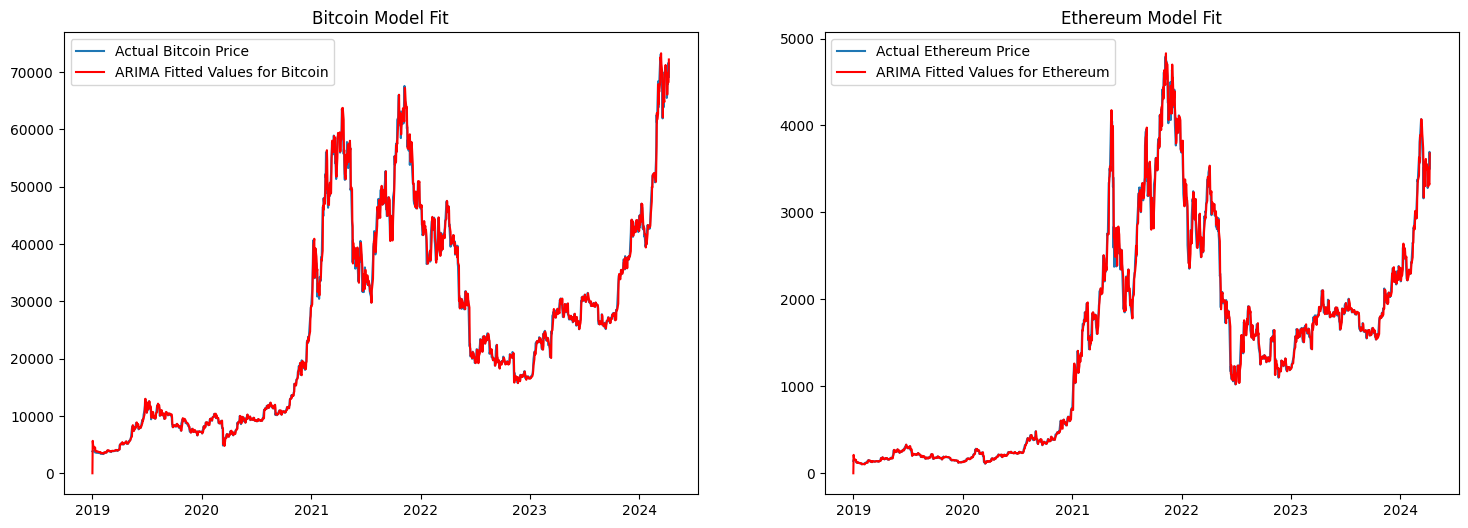

In [18]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit ARIMA model for Bitcoin
btc_model = ARIMA(data['BITCOIN PRICE IN USD'], order=(4, 2, 4))
btc_model_fit = btc_model.fit()

# Fit ARIMA model for Ethereum
eth_model = ARIMA(data['ETHEREUM PRICE IN USD'], order=(2, 2, 2))
eth_model_fit = eth_model.fit()

# Get the fitted values for Bitcoin and Ethereum
btc_fitted_values = btc_model_fit.fittedvalues
eth_fitted_values = eth_model_fit.fittedvalues

# Setup the plot
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Plot for Bitcoin
ax[0].plot(data['BITCOIN PRICE IN USD'], label='Actual Bitcoin Price')
ax[0].plot(btc_fitted_values, label='ARIMA Fitted Values for Bitcoin', color='red')
ax[0].set_title('Bitcoin Model Fit')
ax[0].legend()

# Plot for Ethereum
ax[1].plot(data['ETHEREUM PRICE IN USD'], label='Actual Ethereum Price')
ax[1].plot(eth_fitted_values, label='ARIMA Fitted Values for Ethereum', color='red')
ax[1].set_title('Ethereum Model Fit')
ax[1].legend()

plt.show()

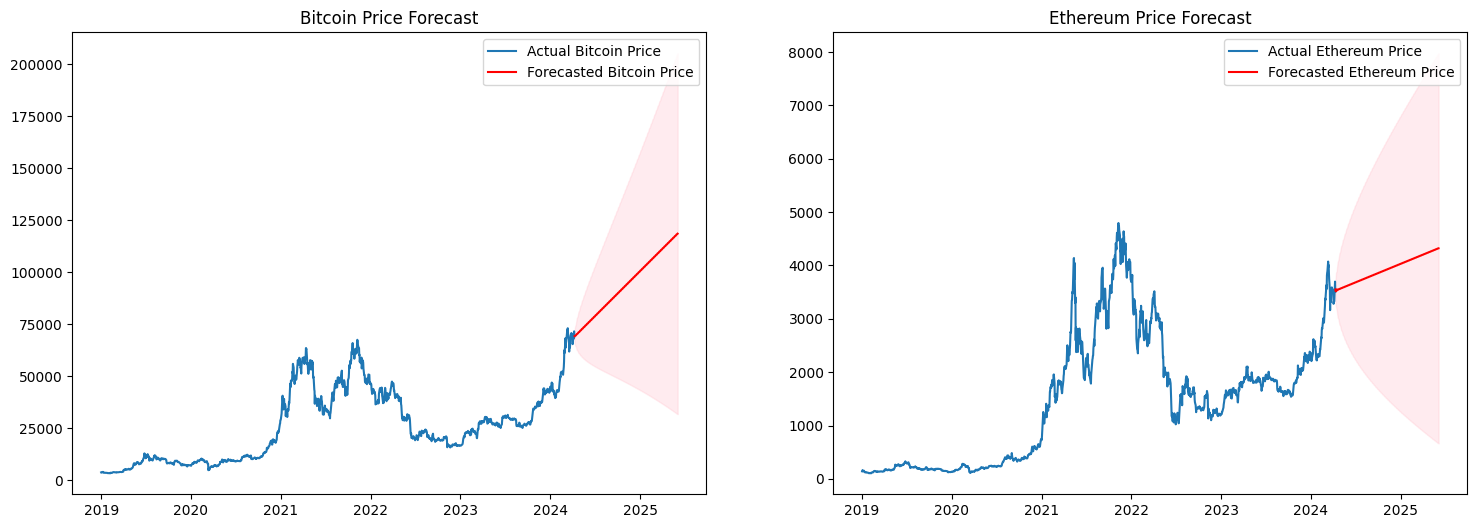

In [19]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Ajustement du modèle ARIMA pour Bitcoin
btc_model = ARIMA(data['BITCOIN PRICE IN USD'], order=(4, 2, 4))
btc_model_fit = btc_model.fit()

# Ajustement du modèle ARIMA pour Ethereum
eth_model = ARIMA(data['ETHEREUM PRICE IN USD'], order=(2, 2, 2))
eth_model_fit = eth_model.fit()

# Prévisions pour Bitcoin
btc_forecast = btc_model_fit.get_forecast(steps=300)
btc_mean = btc_forecast.predicted_mean
btc_conf_int = btc_forecast.conf_int()

# Prévisions pour Ethereum
eth_forecast = eth_model_fit.get_forecast(steps=300)
eth_mean = eth_forecast.predicted_mean
eth_conf_int = eth_forecast.conf_int()

# Setup the plot
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Bitcoin Plot
ax[0].plot(data['BITCOIN PRICE IN USD'], label='Actual Bitcoin Price')
ax[0].plot(btc_mean.index, btc_mean, label='Forecasted Bitcoin Price', color='red')
ax[0].fill_between(btc_mean.index, btc_conf_int.iloc[:, 0], btc_conf_int.iloc[:, 1], color='pink', alpha=0.3)
ax[0].set_title('Bitcoin Price Forecast')
ax[0].legend()

# Ethereum Plot
ax[1].plot(data['ETHEREUM PRICE IN USD'], label='Actual Ethereum Price')
ax[1].plot(eth_mean.index, eth_mean, label='Forecasted Ethereum Price', color='red')
ax[1].fill_between(eth_mean.index, eth_conf_int.iloc[:, 0], eth_conf_int.iloc[:, 1], color='pink', alpha=0.3)
ax[1].set_title('Ethereum Price Forecast')
ax[1].legend()

plt.show()